# Segmentation Olist

Olist est une entreprise brésilienne qui propose une solution de vente en ligne. Elle fournit des données recensant des commandes ayant eu lieu de 2016 à 2018 from 2016 to 2018 effectuées dans différents marchés en ligne au Brésil.

La base de données fournit des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, ainsi que la localisation des clients depuis janvier 2017.

Notre objectif sera donc de comprendre les différents types de clients en analysant leur comportement à l'achat. Proposer ensuite une segmentation en fonction du profil des clients.

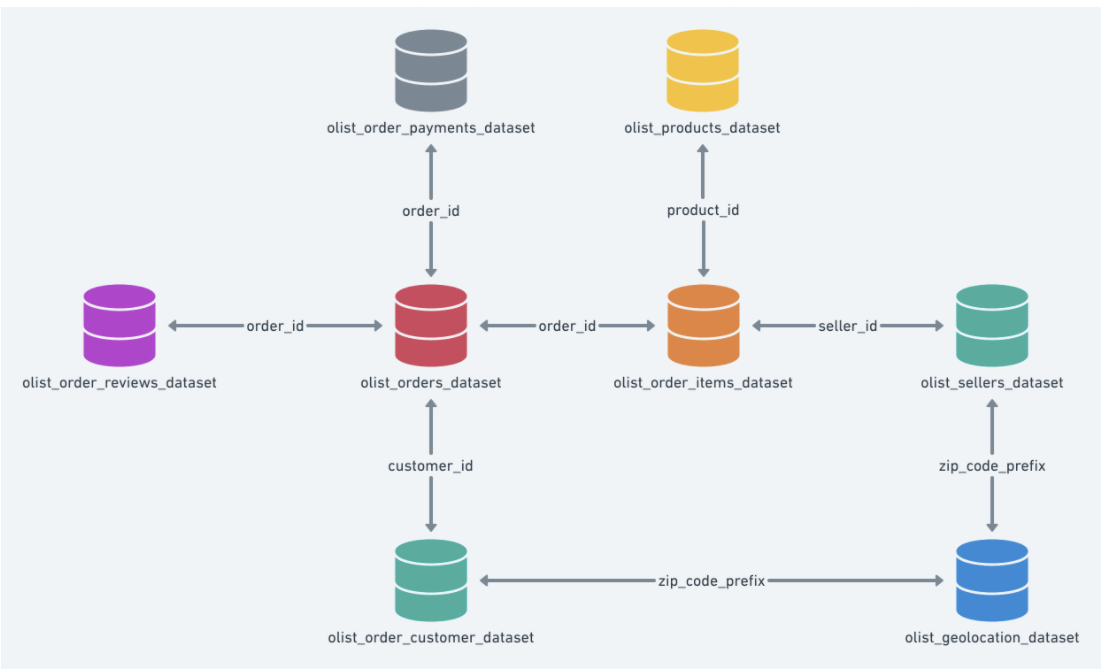

In [ ]:
# Import des librairies nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import scipy
import sklearn
from sklearn.decomposition import PCA

In [11]:
payments = pd.read_csv('olist_order_payments_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
geo = pd.read_csv('olist_geolocation_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv('olist_orders_dataset.csv')


## Customers 

Etant donné que notre objectif est de segmenter les clients, nous allons nous intéresser prioritairement aux variables qui nous seront utiles pour la segmentation, les données concernant les commandes ainsi que les utilisateurs (customers).

In [10]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## Items

Le dataset est composé des colonnes : order_id , order_item_id , product_id, seller_id, shipping_limit_date, price, freight_value.

On va faire de order_id notre unique clé en regroupant par ces attributs :

*    le nombre de produit par commande
*    la moyenne du prix
*    la moyenne des frais de livraisons

Chacune des commandes correspond à un customer_id. customers_unique_id est l'unique identifiant de l'utilisateur the customers dataset. C'est ce dernier que nous allons prendre en compte.

In [12]:
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [14]:
items=pd.DataFrame(items.groupby('order_id')['order_item_id'].sum()).merge(items.groupby('order_id')['price','freight_value'].mean(),
                                  on='order_id')

/tmp/ipykernel_4305/3603301034.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  items=pd.DataFrame(items.groupby('order_id')['order_item_id'].sum()).merge(items.groupby('order_id')['price','freight_value'].mean(),


In [16]:
items.columns = ['nb_items', 'price', 'freight_value']

In [17]:
items.head()

,nb_items,price,freight_value
order_id,,,
00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14


## Payment

Ce dataset contient des données sur les moyens de payements utilisés par les clients :

*    payment_sequential : nombre de méthodes de payement utilisées par chaque client

*    payment_installments: nombre de versements

*    order_id: identifiant unique d'une commande.

*    payment_value : somme dépensée par le client comprenant le prix du produit ainsi que les frais de livraison

*    payment_type : méthode de payement du client.


In [19]:
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [20]:
# On créé des dummy variables pour chaque moyen de payement
dummy_var = pd.get_dummies(payments['payment_type'])
dummy_var

,boleto,credit_card,debit_card,not_defined,voucher
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
103881,1,0,0,0,0
103882,0,1,0,0,0
103883,0,1,0,0,0
103884,0,1,0,0,0


In [21]:
# On concatène les dummy variables avec le dataset originel
payments = pd.concat([payments, dummy_var], axis=1)
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value,boleto,credit_card,debit_card,not_defined,voucher
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0,1,0,0,0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,0,1,0,0,0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,0,1,0,0,0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,0,1,0,0,0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,1,0,0,0,0
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,0,1,0,0,0
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,0,1,0,0,0
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,0,1,0,0,0


In [22]:
dummy_var.columns

Index(['boleto', 'credit_card', 'debit_card', 'not_defined', 'voucher'], dtype='object')

In [25]:
payments=payments.groupby('order_id')['payment_sequential','payment_installments', 'payment_value',
                                    'boleto', 'credit_card', 'debit_card', 'not_defined', 'voucher'].sum()

/tmp/ipykernel_4305/3269865752.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  payments=payments.groupby('order_id')['payment_sequential','payment_installments', 'payment_value',


## Reviews

Une fois que le client reçoit son produit, il est invité par email à remplir un formulaire de satisfaction où il peut attribuer une note et rédiger un commentaire sur la qualité du service.

In [18]:
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


On va créer des features correspondants au nombre de review par commande ainsi que leur moyenne.

In [26]:
reviews=pd.DataFrame(reviews.groupby('order_id')['review_score'].mean()) \
                             .merge(reviews.groupby('order_id')['review_id'].count(), on='order_id')

In [27]:
reviews.columns=['review_score_mean', 'review_nb']

## Jointure des datasets

Le dataset principal pour la jointure des datasets est celui correspondant aux commandes, orders. Nous allons l'utiliser pour le joindre aux autres datasets afin de regrouper toutes les informations utiles à notre segmentation.



In [31]:
customers.drop(columns=['customer_zip_code_prefix','customer_city','customer_state'], inplace=True) 

In [32]:
olist = orders.merge(items, on='order_id').merge(reviews,
                 on='order_id').merge(payments, on='order_id').merge(customers, on='customer_id')

In [33]:
olist

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,nb_items,price,...,review_nb,payment_sequential,payment_installments,payment_value,boleto,credit_card,debit_card,not_defined,voucher,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,29.99,...,1,6,3,38.71,0,1,0,0,2,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,118.70,...,1,1,1,141.46,1,0,0,0,0,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,159.90,...,1,1,3,179.12,0,1,0,0,0,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,45.00,...,1,1,1,72.20,0,1,0,0,0,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,19.90,...,1,1,1,28.62,0,1,0,0,0,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97911,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,72.00,...,1,1,3,85.08,0,1,0,0,0,6359f309b166b0196dbf7ad2ac62bb5a
97912,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,174.90,...,1,1,3,195.00,0,1,0,0,0,da62f9e57a76d978d02ab5362c509660
97913,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,205.99,...,1,1,5,271.01,0,1,0,0,0,737520a9aad80b3fbbdad19b66b37b30
97914,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,3,179.99,...,1,1,4,441.16,0,1,0,0,0,5097a5312c8b157bb7be58ae360ef43c


## Evolution du nombre d'achats à travers le temps

L'év

In [36]:
olist['order_purchase_timestamp'] = pd.to_datetime(olist['order_purchase_timestamp'])
nb_orders = olist.groupby('order_purchase_timestamp')['nb_items'].count().reset_index()
nb_orders.set_index('order_purchase_timestamp', inplace=True)

<AxesSubplot:xlabel='order_purchase_timestamp'>

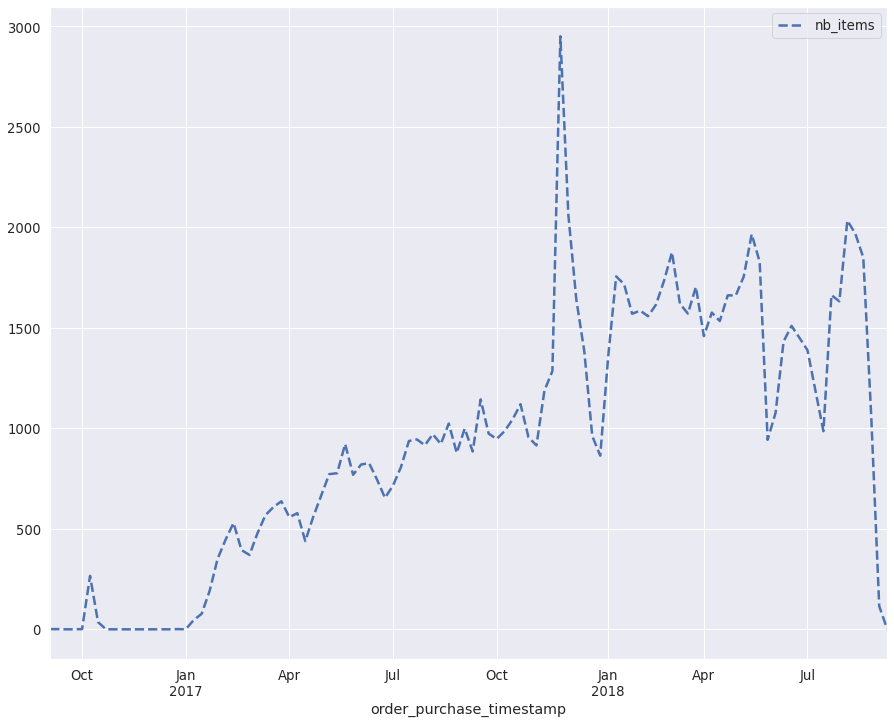

In [37]:
sns.set(rc={'figure.figsize':(15,12)}, font_scale = 1.2)
weekly = nb_orders.resample('W').sum()
weekly.plot(linestyle='dashed',
     linewidth=2.5, markersize=10)

On remarque une constance croissante du nombre de commandes entre octobre 2016 et juillet 2018 avec une soudaine augmentation du nombre de commandes au mois de décembre 2017 qui coïncide avec la période des fêtes de fin d'année.

## Nombre d'achats par commande

Plus le client achète de produits, plus il sera facile de cerner son comportement en terme de catégorie d'achats, de montant dépensé...

<AxesSubplot:xlabel='nb_items', ylabel='count'>

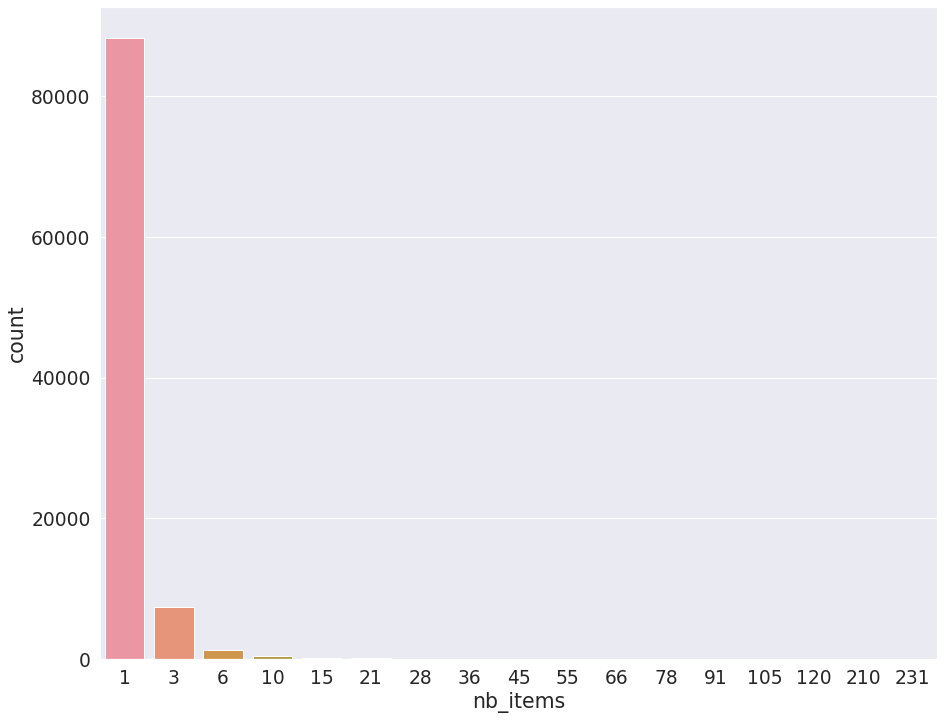

In [39]:
sns.set(rc={'figure.figsize':(15,12)}, font_scale = 1.7)
sns.countplot(data=olist, x='nb_items')

La grande majorité des clients n'ont acheté qu'un seul produit. On ne dispose donc pas d'énormément d'informations sur le comportement de nos clients.

## Méthodes de payements utilisées

Les méthodes de payements utilisées pourraient nous renseigner davantage sur le comportement de nos clients.

In [40]:
l = [olist['credit_card'].sum(), olist['boleto'].sum(),olist['voucher'].sum(), olist['debit_card'].sum()]

In [42]:
payment_means = ['credit_card', 'boleto', 'voucher', 'debit_card']

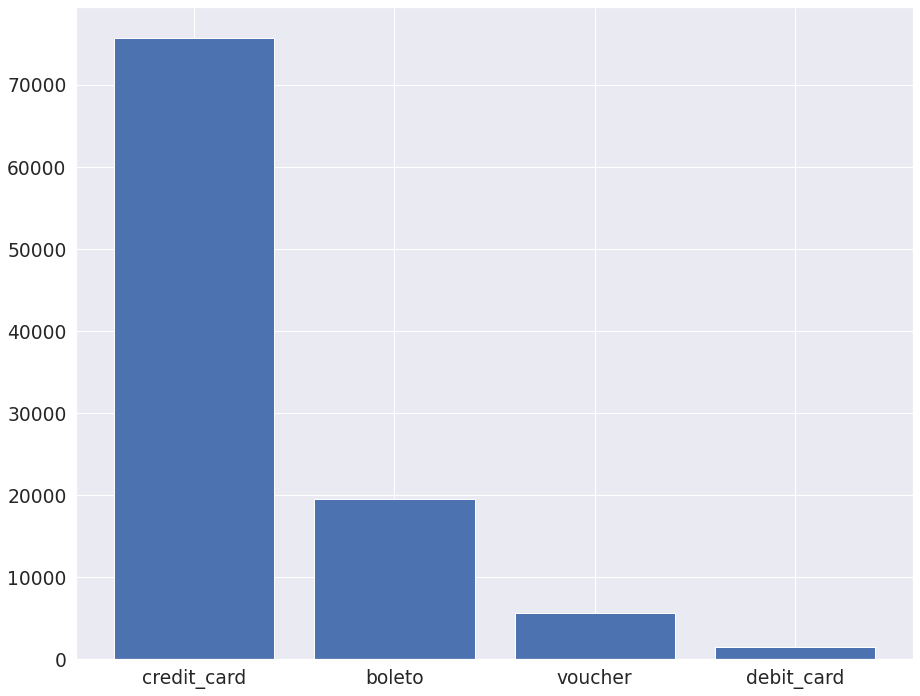

In [43]:
plt.bar(payment_means, l)
plt.show()

On voit que la plupart des commandes sont effectués par carte de crédit. 